In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Read Input Data

In [2]:
df = pd.read_excel('result.xlsx')

In [3]:
df.sort_values('Time',inplace=True)

In [4]:
df.head()

,Avg Area,Avg Depth,Avg Width,Time,n_items
86,2.026,2.603,0.753,0.011,3
31,1.391,1.907,0.733,0.011,3
12,2.200,2.863,0.807,0.012,3
90,5.373,2.763,1.943,0.024,3
153,4.794,2.390,1.943,0.024,3


In [5]:
df2 = df[df['Time'] < 300]
#df2 = df.drop(columns=['Obj heur', 'Obj mod', 'Min Time', 'Max Time', 'Min Area', 'Max Area', 'Min D', 'Max D', 'Min W', 'Max W'])

In [6]:
df2.head()

,Avg Area,Avg Depth,Avg Width,Time,n_items
86,2.026,2.603,0.753,0.011,3
31,1.391,1.907,0.733,0.011,3
12,2.200,2.863,0.807,0.012,3
90,5.373,2.763,1.943,0.024,3
153,4.794,2.390,1.943,0.024,3


## Correlation

In [7]:
df2.corr()

,Avg Area,Avg Depth,Avg Width,Time,n_items
Avg Area,1.000000,0.496933,0.812597,-0.078858,-0.025474
Avg Depth,0.496933,1.000000,-0.064538,-0.006954,0.077109
Avg Width,0.812597,-0.064538,1.000000,-0.076544,-0.089146
Time,-0.078858,-0.006954,-0.076544,1.000000,0.666886
n_items,-0.025474,0.077109,-0.089146,0.666886,1.000000


Plot of correlation

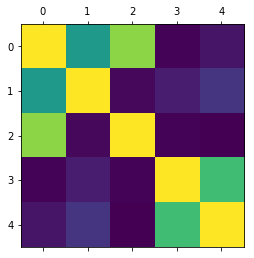

In [8]:
plt.matshow(df2.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8824e715d0>,
      dtype=object)

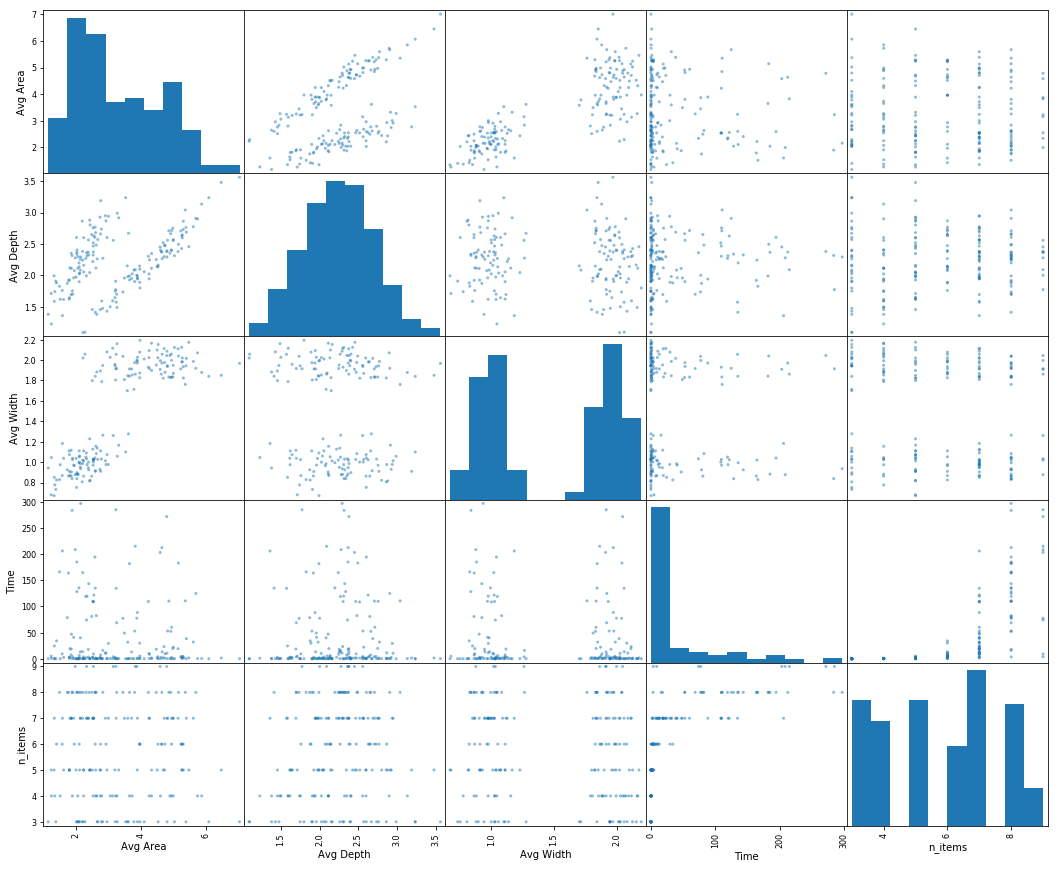

In [9]:
pd.plotting.scatter_matrix(df2, figsize=(18,15))

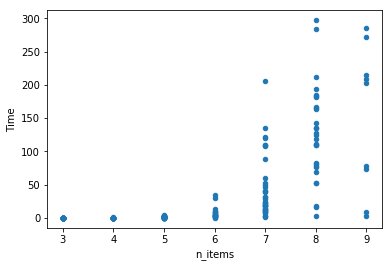

In [10]:
df2.plot.scatter('n_items', 'Time')

## Analyze data information

In [11]:
df2.reset_index(inplace=True,drop=True)

In [12]:
df3 = df2.drop(columns=['Time'])

## Rescale data

In [13]:
scaler = StandardScaler()

In [14]:
df3 = pd.DataFrame(data = scaler.fit_transform(df3))

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Rescaled data

In [15]:
df3.head()

,0,1,2,3
0,-0.969278,0.784051,-1.439053,-1.466532
1,-1.455877,-0.713928,-1.478815,-1.466532
2,-0.835942,1.343640,-1.331697,-1.466532
3,1.595524,1.128413,0.926753,-1.466532
4,1.151837,0.325618,0.926753,-1.466532


## PCA

In [16]:
pca = PCA()

In [17]:
principalDf = pd.DataFrame(data = pca.fit_transform(df3), columns = ['pc1','pc2','pc3','pc4'])

In [18]:
cumul_expl_var_ratio = pca.explained_variance_ratio_.cumsum()

In [19]:
cumul_expl_var_ratio

array([0.48174916, 0.76742961, 0.99553   , 1.        ])

In [20]:
pca.explained_variance_ratio_

array([0.48174916, 0.28568045, 0.22810039, 0.00447   ])

Data in the new system

In [21]:
principalDf.head()

,pc1,pc2,pc3,pc4
0,-1.232480,-0.162619,2.054039,0.106296
1,-2.110393,0.878264,1.309399,-0.165071
2,-0.882872,-0.512597,2.301701,0.297076
3,2.161175,0.394971,1.409830,-0.119587
4,1.572685,0.970747,1.005513,-0.124888


New orthogonal system vectors

In [22]:
pca.components_

array([[ 0.71607994,  0.33728926,  0.60905353, -0.05019233],
       [-0.05237412, -0.68826832,  0.39264986, -0.60775797],
       [-0.01035103,  0.50935691, -0.33521932, -0.79251271],
       [-0.69597365,  0.3912521 ,  0.60208628,  0.00588009]])

In [23]:
df_compressed = principalDf.drop(columns=['pc4'])
df_compressed = pd.concat([df_compressed, df2['Time']],axis=1)

In [24]:
df_compressed.head()

,pc1,pc2,pc3,Time
0,-1.232480,-0.162619,2.054039,0.011
1,-2.110393,0.878264,1.309399,0.011
2,-0.882872,-0.512597,2.301701,0.012
3,2.161175,0.394971,1.409830,0.024
4,1.572685,0.970747,1.005513,0.024


In [25]:
df_compressed.corr()

,pc1,pc2,pc3,Time
pc1,1.000000e+00,-3.343770e-18,1.323763e-16,-0.100065
pc2,-3.343770e-18,1.000000e+00,1.664349e-16,-0.398925
pc3,1.323763e-16,1.664349e-16,1.000000e+00,-0.529297
Time,-1.000646e-01,-3.989255e-01,-5.292967e-01,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8821f563d0>,
      dtype=object)

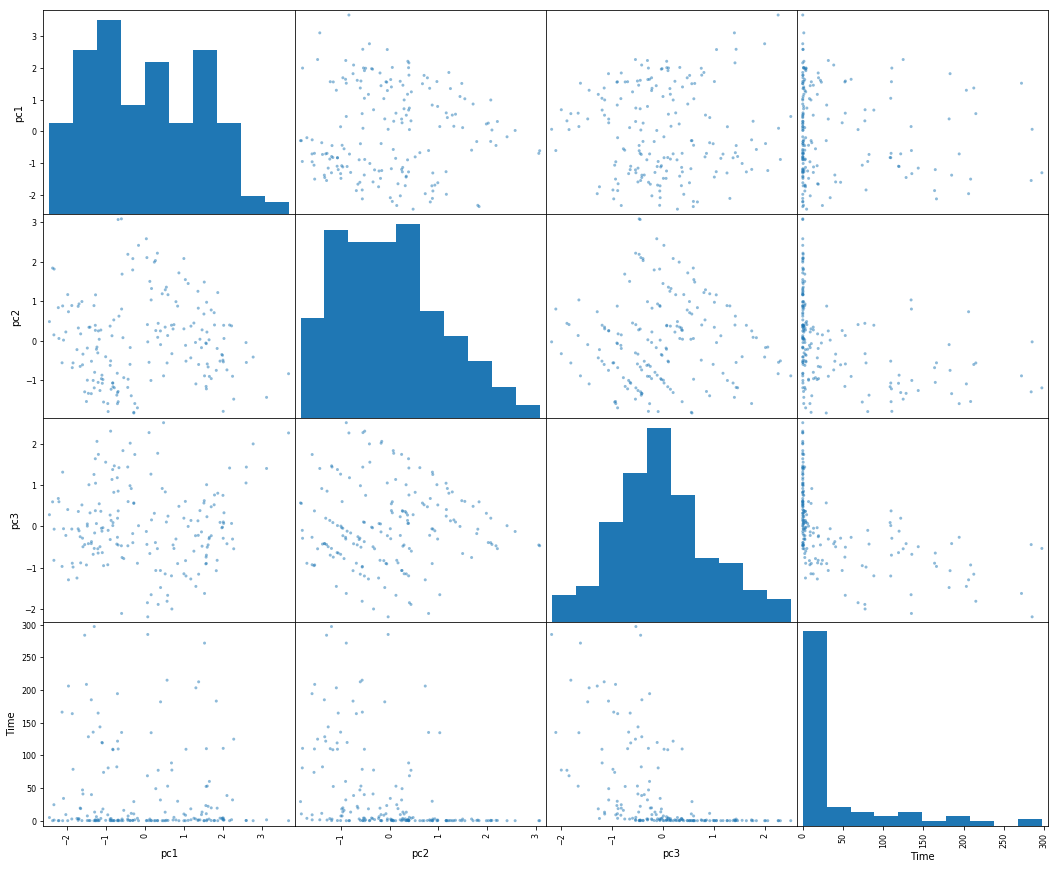

In [26]:
pd.plotting.scatter_matrix(df_compressed, figsize=(18,15))

## Linear Regression

In [27]:
regressor = LinearRegression()

In [28]:
X = df_compressed.copy()
y = X.pop('Time')

In [29]:
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)